## Bank Dataset

## Problem Statement
The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,in order to access if the product (bank term deposit) would be (or not) subscribed. 
The classification goal is to predict if the client will subscribe a term deposit (variable approved).

#### Importing important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the Data

In [2]:
data1=pd.read_excel("Bank_file1.xlsx")

In [3]:
data2=pd.read_excel("Bank_file2.xlsx")

In [4]:
data3=pd.read_excel("bank_file3.xlsx")

In [5]:
data4=pd.read_excel("Bank_target file.xlsx")

#### Knowing about the Data

In [6]:
data1.shape

(4119, 5)

In [7]:
data2.shape

(4119, 6)

In [8]:
data3.shape

(4119, 12)

In [9]:
data4.shape

(4119, 2)

In [10]:
data1.describe()

age
count  4119.000000
mean     40.113620
std      10.313362
min      18.000000
25%      32.000000
50%      38.000000
75%      47.000000
max      88.000000

In [11]:
data2.describe()

ID default housing  loan   contact month
count   4119    4119    4119  4119      4119  4119
unique  4119       3       3     3         2    10
top       C1      no     yes    no  cellular   may
freq       1    3315    2175  3349      2652  1378

In [12]:
data3.describe()

duration     campaign        pdays     previous  emp.var.rate  \
count  4119.000000  4119.000000  4119.000000  4119.000000   4119.000000   
mean    256.788055     2.537266   960.422190     0.190337      0.084972   
std     254.703736     2.568159   191.922786     0.541788      1.563114   
min       0.000000     1.000000     0.000000     0.000000     -3.400000   
25%     103.000000     1.000000   999.000000     0.000000     -1.800000   
50%     181.000000     2.000000   999.000000     0.000000      1.100000   
75%     317.000000     3.000000   999.000000     0.000000      1.400000   
max    3643.000000    35.000000   999.000000     6.000000      1.400000   

       cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count     4119.000000    4119.000000  4119.000000  4119.000000  
mean        93.579704     -40.499102     3.621356  5166.481695  
std          0.579349       4.594578     1.733591    73.667904  
min         92.201000     -50.800000     0.635000  4963.600000  
25%         93.075000     -42.700000     1.334000  5099.100000  
50%         93.749000     -41.800000     4.857000  5191.000000  
75%         93.994000     -36.400000     4.961000  5228.100000  
max         94.767000     -26.900000     5.045000  5228.100000

In [13]:
data4.describe()

ID approved
count   4119     4119
unique  4119        2
top       C1       no
freq       1     3668

In [14]:
data1.dtypes

ID           object
age           int64
job          object
marital      object
education    object
dtype: object

In [15]:
data2.dtypes

ID         object
default    object
housing    object
loan       object
contact    object
month      object
dtype: object

In [16]:
data3.dtypes

ID                 object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [17]:
data4.dtypes

ID          object
approved    object
dtype: object

In [18]:
data1.nunique()

ID           4119
age            67
job            12
marital         4
education       8
dtype: int64

In [19]:
data2.nunique()

ID         4119
default       3
housing       3
loan          3
contact       2
month        10
dtype: int64

In [20]:
data3.nunique()

ID                4119
day_of_week          5
duration           828
campaign            25
pdays               21
previous             7
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          234
nr.employed         11
dtype: int64

In [21]:
data4.nunique()

ID          4119
approved       2
dtype: int64

#### Merging all the Datasets

In [22]:
data=pd.merge(data1,pd.merge(data2,pd.merge(data3,data4)))

In [23]:
data

ID  age          job  marital          education default  housing  \
0        C1   30  blue-collar  married           basic.9y      no      yes   
1        C2   39     services   single        high.school      no       no   
2        C3   25     services  married        high.school      no      yes   
3        C4   38     services  married           basic.9y      no  unknown   
4        C5   47       admin.  married  university.degree      no      yes   
...     ...  ...          ...      ...                ...     ...      ...   
4114  C4115   30       admin.  married           basic.6y      no      yes   
4115  C4116   39       admin.  married        high.school      no      yes   
4116  C4117   27      student   single        high.school      no       no   
4117  C4118   58       admin.  married        high.school      no       no   
4118  C4119   34   management   single        high.school      no      yes   

         loan    contact month  ... campaign  pdays  previous     poutcome  \
0          no   cellular   may  ...        2    999         0  nonexistent   
1          no  telephone   may  ...        4    999         0  nonexistent   
2          no  telephone   jun  ...        1    999         0  nonexistent   
3     unknown  telephone   jun  ...        3    999         0  nonexistent   
4          no   cellular   nov  ...        1    999         0  nonexistent   
...       ...        ...   ...  ...      ...    ...       ...          ...   
4114      yes   cellular   jul  ...        1    999         0  nonexistent   
4115       no  telephone   jul  ...        1    999         0  nonexistent   
4116       no   cellular   may  ...        2    999         1      failure   
4117       no   cellular   aug  ...        1    999         0  nonexistent   
4118       no   cellular   nov  ...        1    999         0  nonexistent   

      emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0             -1.8         92.893          -46.2      1.313       5099.1   
1              1.1         93.994          -36.4      4.855       5191.0   
2              1.4         94.465          -41.8      4.962       5228.1   
3              1.4         94.465          -41.8      4.959       5228.1   
4             -0.1         93.200          -42.0      4.191       5195.8   
...            ...            ...            ...        ...          ...   
4114           1.4         93.918          -42.7      4.958       5228.1   
4115           1.4         93.918          -42.7      4.959       5228.1   
4116          -1.8         92.893          -46.2      1.354       5099.1   
4117           1.4         93.444          -36.1      4.966       5228.1   
4118          -0.1         93.200          -42.0      4.120       5195.8   

      approved  
0           no  
1           no  
2           no  
3           no  
4           no  
...        ...  
4114        no  
4115        no  
4116        no  
4117        no  
4118        no  

[4119 rows x 22 columns]

In [24]:
data.shape

(4119, 22)

In [25]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'approved'],
      dtype='object')

In [26]:
data.nunique()

ID                4119
age                 67
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration           828
campaign            25
pdays               21
previous             7
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          234
nr.employed         11
approved             2
dtype: int64

In [27]:
data.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
approved          0
dtype: int64

In [29]:
data.dtypes

ID                 object
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
approved           object
dtype: object

In [30]:
data.describe()

age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.400000       92.201000     -50.800000     0.635000  4963.600000  
25%       -1.800000       93.075000     -42.700000     1.334000  5099.100000  
50%        1.100000       93.749000     -41.800000     4.857000  5191.000000  
75%        1.400000       93.994000     -36.400000     4.961000  5228.100000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

#### Exploratory Data Analysis

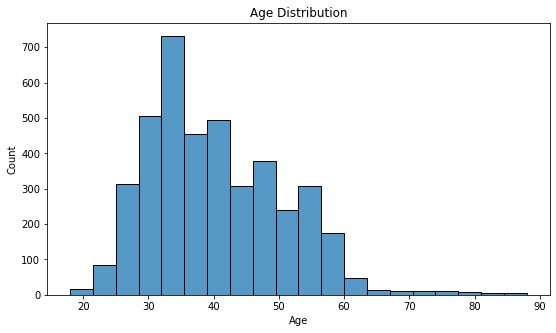

In [31]:
plt.figure(figsize=(9,5))
sns.histplot(x='age', data=data, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

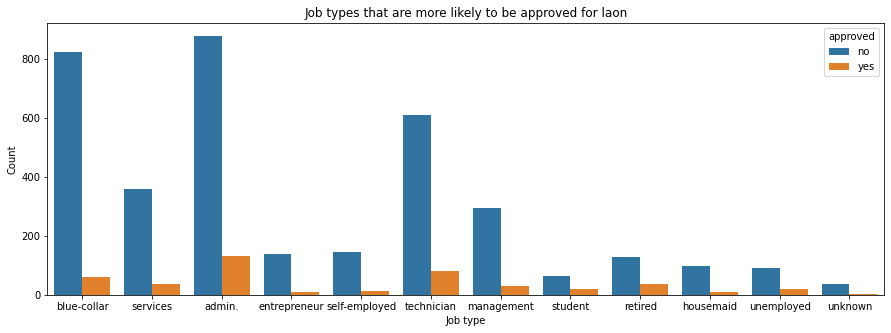

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x='job', hue='approved', data=data)
plt.title('Job types that are more likely to be approved for laon')
plt.xlabel('Job type')
plt.ylabel('Count')
plt.show()

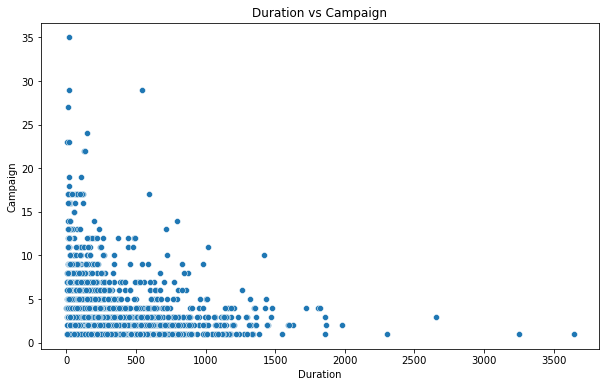

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='duration', y='campaign', data=data)
plt.title('Duration vs Campaign')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.show()

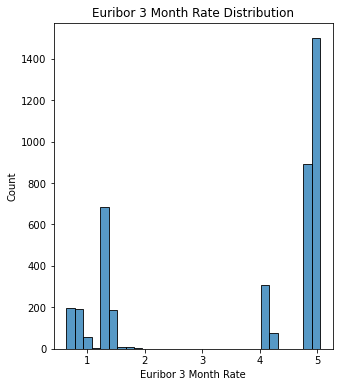

In [35]:
plt.figure(figsize=(5,6))
sns.histplot(x='euribor3m', data=data, bins=30)
plt.title('Euribor 3 Month Rate Distribution')
plt.xlabel('Euribor 3 Month Rate')
plt.ylabel('Count')
plt.show()

#### Creating Bins for numerical attributes to convert into categorical attributes

In [37]:
data['age'] = pd.cut(data['age'], bins=4,labels=["Young_age","Middle_age","Old_age","Very Old"])

In [38]:
data['duration'] = pd.cut(data['duration'], bins=[0.000000,900.000000,1800.000000,2700.000000,3643.000000],labels=["less than 15mins","less than 30mins","greater than 30mins","less than 1hr"])

In [39]:
data['campaign'] = pd.cut(data['campaign'], bins=4,labels=["less than 12","less than 24","less than 36","less than 50"])

In [40]:
data['pdays'] = pd.cut(data['pdays'], bins=[0.000000,182.000000,365.000000,730.000000,999.000000],labels=["less than 6 months","less than 1yr","less than 2yrs","more than 2yrs"])

In [41]:
data['previous'] = pd.cut(data['previous'], bins=3,labels=["minimal","normal","many"])

In [42]:
data['emp.var.rate'] = pd.cut(data['emp.var.rate'], bins=3,labels=["1","2","3"])

In [43]:
data['cons.price.idx'] = pd.cut(data['cons.price.idx'], bins=2,labels=["1","2"])

In [44]:
data['cons.conf.idx'] = pd.cut(data['cons.conf.idx'], bins=4,labels=["1","2","3","4"])

In [45]:
data['euribor3m'] = pd.cut(data['euribor3m'], bins=5,labels=["1","2","3","4","5"])

In [46]:
data['nr.employed'] = pd.cut(data['nr.employed'], bins=5,labels=["1","2","3","4","5"])

In [47]:
data

ID         age          job  marital          education default  \
0        C1   Young_age  blue-collar  married           basic.9y      no   
1        C2  Middle_age     services   single        high.school      no   
2        C3   Young_age     services  married        high.school      no   
3        C4  Middle_age     services  married           basic.9y      no   
4        C5  Middle_age       admin.  married  university.degree      no   
...     ...         ...          ...      ...                ...     ...   
4114  C4115   Young_age       admin.  married           basic.6y      no   
4115  C4116  Middle_age       admin.  married        high.school      no   
4116  C4117   Young_age      student   single        high.school      no   
4117  C4118     Old_age       admin.  married        high.school      no   
4118  C4119   Young_age   management   single        high.school      no   

      housing     loan    contact month  ...      campaign           pdays  \
0         yes       no   cellular   may  ...  less than 12  more than 2yrs   
1          no       no  telephone   may  ...  less than 12  more than 2yrs   
2         yes       no  telephone   jun  ...  less than 12  more than 2yrs   
3     unknown  unknown  telephone   jun  ...  less than 12  more than 2yrs   
4         yes       no   cellular   nov  ...  less than 12  more than 2yrs   
...       ...      ...        ...   ...  ...           ...             ...   
4114      yes      yes   cellular   jul  ...  less than 12  more than 2yrs   
4115      yes       no  telephone   jul  ...  less than 12  more than 2yrs   
4116       no       no   cellular   may  ...  less than 12  more than 2yrs   
4117       no       no   cellular   aug  ...  less than 12  more than 2yrs   
4118      yes       no   cellular   nov  ...  less than 12  more than 2yrs   

     previous     poutcome emp.var.rate cons.price.idx cons.conf.idx  \
0     minimal  nonexistent            1              1             1   
1     minimal  nonexistent            3              2             3   
2     minimal  nonexistent            3              2             2   
3     minimal  nonexistent            3              2             2   
4     minimal  nonexistent            3              1             2   
...       ...          ...          ...            ...           ...   
4114  minimal  nonexistent            3              2             2   
4115  minimal  nonexistent            3              2             2   
4116  minimal      failure            1              1             1   
4117  minimal  nonexistent            3              1             3   
4118  minimal  nonexistent            3              1             2   

     euribor3m nr.employed approved  
0            1           3       no  
1            5           5       no  
2            5           5       no  
3            5           5       no  
4            5           5       no  
...        ...         ...      ...  
4114         5           5       no  
4115         5           5       no  
4116         1           3       no  
4117         5           5       no  
4118         4           5       no  

[4119 rows x 22 columns]

#### Dropping null values

In [48]:
data.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          1
campaign          0
pdays             2
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
approved          0
dtype: int64

In [49]:
data.dropna(inplace=True)

In [50]:
data.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
approved          0
dtype: int64

In [51]:
data.shape

(4116, 22)

In [52]:
data.dtypes

ID                  object
age               category
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration          category
campaign          category
pdays             category
previous          category
poutcome            object
emp.var.rate      category
cons.price.idx    category
cons.conf.idx     category
euribor3m         category
nr.employed       category
approved            object
dtype: object

#### Dropping the ID column

In [55]:
data=data.drop('ID',1)

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_25580\1215692932.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop('ID',1)


#### One-Hot-Encoding function for converting categorical attributes to numerical attributes excluding target attribute

In [58]:
def ohe(data,cat_cols):
    for column in cat_cols:
        for i in data[f'{column}'].unique():
            data[f'{column}_{i}']=np.where(data[f'{column}']==i,1,0)
        data=data.drop(column,1)
    return data

In [59]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'approved'],
      dtype='object')

In [60]:
cat_cols=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [61]:
data=ohe(data,cat_cols)

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_25580\1559659262.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop(column,1)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_25580\1559659262.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop(column,1)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_25580\1559659262.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop(column,1)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_25580\1559659262.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop(column,1)
C:\Users\Shruthi\AppData\Local\Temp\ipykernel_25580\1559659262.py:5: FutureWarning: In a

#### Label Encoding function for target attribute

In [62]:
data["approved"]=np.where(data["approved"]=='yes',1,0)

In [63]:
data

approved  age_Young_age  age_Middle_age  age_Old_age  age_Very Old  \
0            0              1               0            0             0   
1            0              0               1            0             0   
2            0              1               0            0             0   
3            0              0               1            0             0   
4            0              0               1            0             0   
...        ...            ...             ...          ...           ...   
4114         0              1               0            0             0   
4115         0              0               1            0             0   
4116         0              1               0            0             0   
4117         0              0               0            1             0   
4118         0              1               0            0             0   

      job_blue-collar  job_services  job_admin.  job_entrepreneur  \
0                   1             0           0                 0   
1                   0             1           0                 0   
2                   0             1           0                 0   
3                   0             1           0                 0   
4                   0             0           1                 0   
...               ...           ...         ...               ...   
4114                0             0           1                 0   
4115                0             0           1                 0   
4116                0             0           0                 0   
4117                0             0           1                 0   
4118                0             0           0                 0   

      job_self-employed  ...  cons.conf.idx_2  cons.conf.idx_4  euribor3m_1  \
0                     0  ...                0                0            1   
1                     0  ...                0                0            0   
2                     0  ...                1                0            0   
3                     0  ...                1                0            0   
4                     0  ...                1                0            0   
...                 ...  ...              ...              ...          ...   
4114                  0  ...                1                0            0   
4115                  0  ...                1                0            0   
4116                  0  ...                0                0            1   
4117                  0  ...                0                0            0   
4118                  0  ...                1                0            0   

      euribor3m_5  euribor3m_4  euribor3m_2  nr.employed_3  nr.employed_5  \
0               0            0            0              1              0   
1               1            0            0              0              1   
2               1            0            0              0              1   
3               1            0            0              0              1   
4               1            0            0              0              1   
...           ...          ...          ...            ...            ...   
4114            1            0            0              0              1   
4115            1            0            0              0              1   
4116            0            0            0              1              0   
4117            1            0            0              0              1   
4118            0            1            0              0              1   

      nr.employed_1  nr.employed_2  
0                 0              0  
1                 0              0  
2                 0              0  
3                 0              0  
4                 0              0  
...             ...            ...  
4114              0              0  
4115              0              0  
4116              0              0  
4117              0 

In [64]:
data.shape

(4116, 88)

#### Train Test Splitting

In [65]:
from sklearn.model_selection import train_test_split
X=data.drop('approved',1)
y=data['approved']
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104,test_size=0.3,shuffle=True)

C:\Users\Shruthi\AppData\Local\Temp\ipykernel_25580\1533897084.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('approved',1)


In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2881, 87)
(1235, 87)
(2881,)
(1235,)


#### Model Building function for CHAID Algorithm

In [67]:
from scipy.stats import chi2_contingency

class decision:
    def __init__(self, max_depth=None, alpha=0.05):
        self.tree = {}
        self.route = []
        self.max_depth = max_depth
        self.alpha = alpha

    def chisquare(self, x, column1, y):
        df = x.copy()
        df['target'] = y
        target = 'target'
        ct = pd.crosstab(df[f'{column1}'], df['target'])
        chi2, p, dof, expected = chi2_contingency(ct)
        return p

    def best_feature(self, x, y, bf=''):
        df = x.copy()
        df['target'] = y
        target = 'target'
        p_values = {}
        listofcolumns = list(df.columns)
        listofcolumns.remove(target)
        if bf not in listofcolumns:
            listofcolumns = listofcolumns
        elif bf in listofcolumns:
            listofcolumns.remove(bf)
        for i in listofcolumns:
            p = self.chisquare(x, i, y)
            if p <= self.alpha:
                p_values[i] = p
        if not p_values:
            return None
        feature = pd.DataFrame(p_values, index=['p_value']).T
        return feature['p_value'].idxmin()

    def hypothesis_testing(self, x, y, bf):
        df = x.copy()
        df['target'] = y
        target = 'target'
        ct = pd.crosstab(df[f'{bf}'], df['target'])
        chi2, p, dof, expected = chi2_contingency(ct)
        if p <= self.alpha:
            return True  # reject null hypothesis
        else:
            return False  # fail to reject null hypothesis
        
    def split(self, x, y, path=None, depth=0):
        df = x.copy()
        df['target'] = y
        target = 'target'
        if path is None:
            path = []
        bf = self.best_feature(x, y)
        if bf is None or (self.max_depth is not None and depth >= self.max_depth):
            # If no best feature is found or the max depth is reached, return the majority class of the parent node
            majority_class = df[target].mode()[0]
            self.route.append((path, majority_class))
            print(f"{path} => {majority_class}")
            return None
        else:
            node = {'feature': bf, 'children': {}}
            path.append(bf)
            for val in df[bf].unique():
                node['children'][val] = self.split(df[df[bf] == val].drop(columns=[bf, target]), 
                                                    df[df[bf] == val][target],
                                                    path=path,
                                                    depth=depth+1)
            path.pop()
            return node
        
    def predict(self, x):
        predictions = []
        for i, row in x.iterrows():
            for path, decision in self.route:
                a = 0
                for branch in path:
                    col, val = branch.split('->')
                    if str(row[col]) != val:
                        a = 1
                        break
                if a == 0:
                    predictions.append(decision)
                    break
            else:
                counts = {}
                for path, decision in self.route:
                    last_branch = path[-1]
                    _, last_val = last_branch.split('->')
                    if last_val not in counts:
                        counts[last_val] = 0
                    counts[last_val] += 1
                mode = max(counts, key=counts.get)
                predictions.append(mode)
        return predictions

#### The decision tree built using the model building function

In [68]:
a=decision()
a.split(x=X_train,y=y_train)

['pdays_more than 2yrs', 'duration_less than 15mins', 'emp.var.rate_3', 'month_oct', 'age_Middle_age', 'month_may'] => 0
['pdays_more than 2yrs', 'duration_less than 15mins', 'emp.var.rate_3', 'month_oct', 'age_Middle_age', 'month_may'] => 0
['pdays_more than 2yrs', 'duration_less than 15mins', 'emp.var.rate_3', 'month_oct', 'age_Middle_age', 'marital_unknown'] => 0
['pdays_more than 2yrs', 'duration_less than 15mins', 'emp.var.rate_3', 'month_oct', 'age_Middle_age', 'marital_unknown'] => 1
['pdays_more than 2yrs', 'duration_less than 15mins', 'emp.var.rate_3', 'month_oct'] => 1
['pdays_more than 2yrs', 'duration_less than 15mins', 'emp.var.rate_3', 'cons.conf.idx_1', 'euribor3m_1', 'job_retired', 'emp.var.rate_1', 'job_admin.'] => 0
['pdays_more than 2yrs', 'duration_less than 15mins', 'emp.var.rate_3', 'cons.conf.idx_1', 'euribor3m_1', 'job_retired', 'emp.var.rate_1', 'job_admin.', 'month_may'] => 0
['pdays_more than 2yrs', 'duration_less than 15mins', 'emp.var.rate_3', 'cons.conf.id

{'feature': 'pdays_more than 2yrs',
 'children': {1: {'feature': 'duration_less than 15mins',
   'children': {1: {'feature': 'emp.var.rate_3',
     'children': {1: {'feature': 'month_oct',
       'children': {0: {'feature': 'age_Middle_age',
         'children': {0: {'feature': 'month_may',
           'children': {1: None, 0: None}},
          1: {'feature': 'marital_unknown', 'children': {0: None, 1: None}}}},
        1: None}},
      0: {'feature': 'cons.conf.idx_1',
       'children': {1: {'feature': 'euribor3m_1',
         'children': {1: {'feature': 'job_retired',
           'children': {0: {'feature': 'emp.var.rate_1',
             'children': {1: {'feature': 'job_admin.',
               'children': {0: None,
                1: {'feature': 'month_may', 'children': {1: None, 0: None}}}},
              0: None}},
            1: None}},
          0: None}},
        0: {'feature': 'contact_cellular',
         'children': {0: {'feature': 'job_unemployed',
           'children': {0: No

#### Predictions

In [69]:
y_pred=a.predict(X_train)

y_test_pred=a.predict(X_test)

#### Model evaluation 

In [70]:
train_accuracy = np.mean(y_pred == y_train)
print(f"train Accuracy: {train_accuracy:.2%}")

train Accuracy: 89.38%


In [71]:
test_accuracy = np.mean(y_test_pred == y_test)
print(f"test Accuracy: {test_accuracy:.2%}")

test Accuracy: 88.42%
